# L4: Structured Generation with Outlines

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> This notebook takes about 30 seconds to be ready to use. You may start and watch the video while you wait.</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import outlines

# Downloads the model from HuggingFace if you don't already have it, 
# then loads it into memory
model = outlines.models.transformers(
    "HuggingFaceTB/SmolLM2-135M-Instruct"
)

config.json:   0%|          | 0.00/861 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

<div style="background-color:#fff6ff; padding:13px; border-width:3px; border-color:#efe6ef; border-style:solid; border-radius:6px">
<p> 💻 &nbsp; <b>Access <code>requirements.txt</code> and <code>helper.py</code> files:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Open"</em>.

<p> ⬇ &nbsp; <b>Download Notebooks:</b> 1) click on the <em>"File"</em> option on the top menu of the notebook and then 2) click on <em>"Download as"</em> and select <em>"Notebook (.ipynb)"</em>.</p>

<p> 📒 &nbsp; For more help, please see the <em>"Appendix – Tips, Help, and Download"</em> Lesson.</p>
</div>

In [3]:
from pydantic import BaseModel

class Person(BaseModel):
    name: str
    age: int

In [4]:
from utils import track_logits

generator = outlines.generate.json(
    model, 
    Person,
    sampler = outlines.samplers.greedy()
)

# Add tools to track token probabilities as they are generated
track_logits(generator)

## Chat templating

In [5]:
from utils import template

print(template(
    model, 
    "Give me a person with a name and an age.",
    system_prompt="You create users."
))

<|im_start|>system
You create users.<|im_end|>
<|im_start|>user
Give me a person with a name and an age.<|im_end|>
<|im_start|>assistant



In [6]:
# Remove any previously tracked logits
generator.logits_processor.clear()

person = generator(
    template(
        model, 
        "Give me a person with a name and an age.",
        system_prompt="You create users."
    ),
)

person

Person(name='John', age=30)

## The basic structure

In [7]:
print(person.model_dump_json(indent=2))

{
  "name": "John",
  "age": 30
}


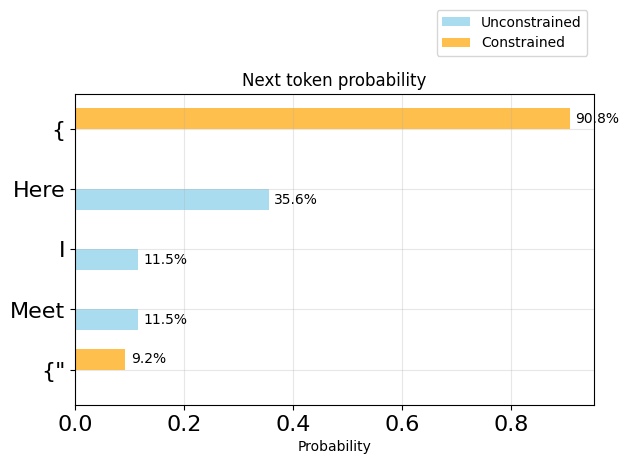

In [8]:
from utils import plot_token_distributions

plot_token_distributions(generator.logits_processor, positions=[0], k=5)

## You try!

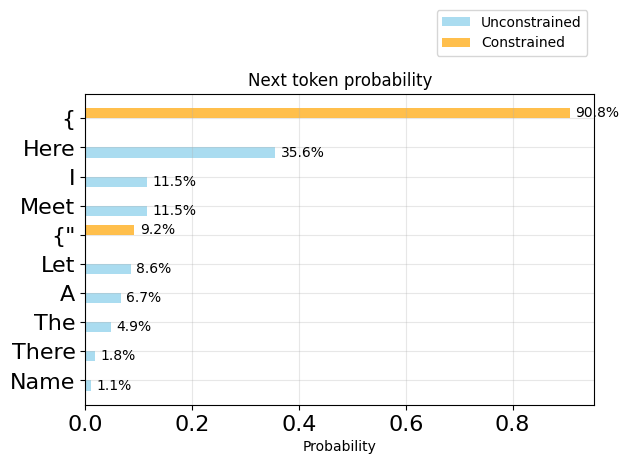

In [9]:
from utils import plot_token_distributions

plot_token_distributions(generator.logits_processor, positions=[0], k=10)

## What's in a name?

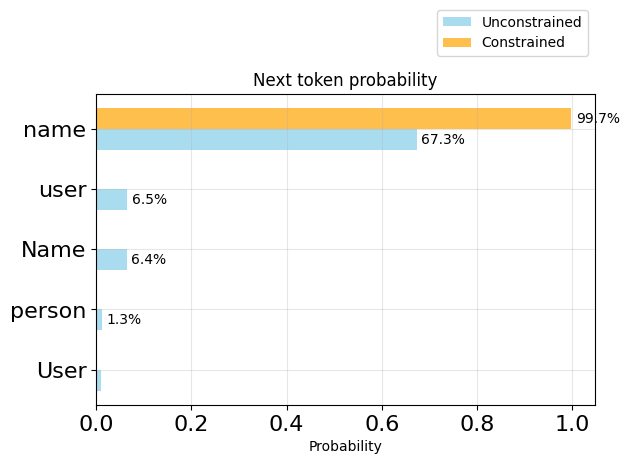

In [10]:
plot_token_distributions(generator.logits_processor, positions=[3], k=5)

In [11]:
print(generator.logits_processor.sequence(5))


{ "name


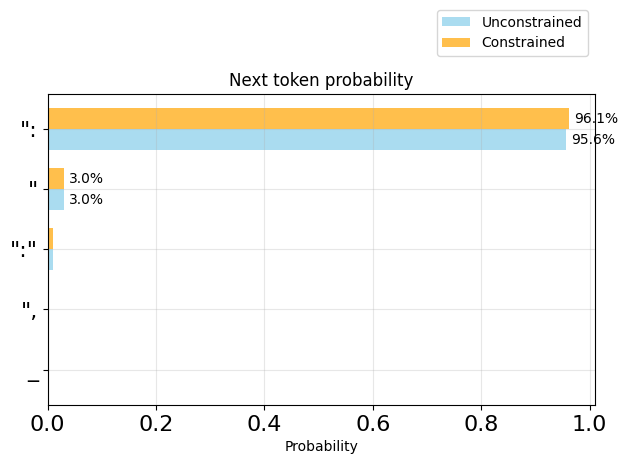

In [12]:
plot_token_distributions(generator.logits_processor, positions=[4], k=5)

In [13]:
print(generator.logits_processor.sequence(7))


{ "name": "


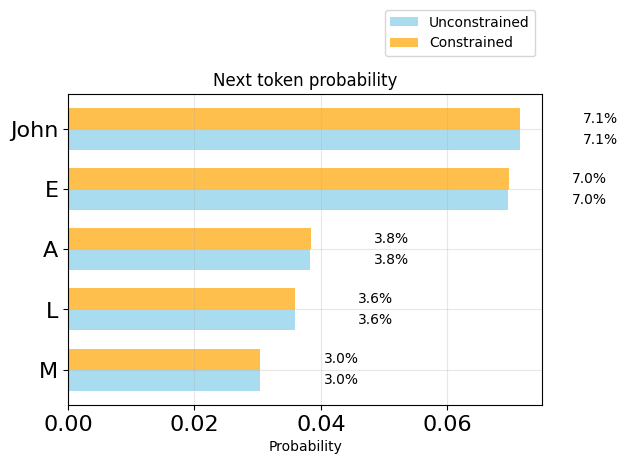

In [14]:
plot_token_distributions(generator.logits_processor, positions=[6], k=5)

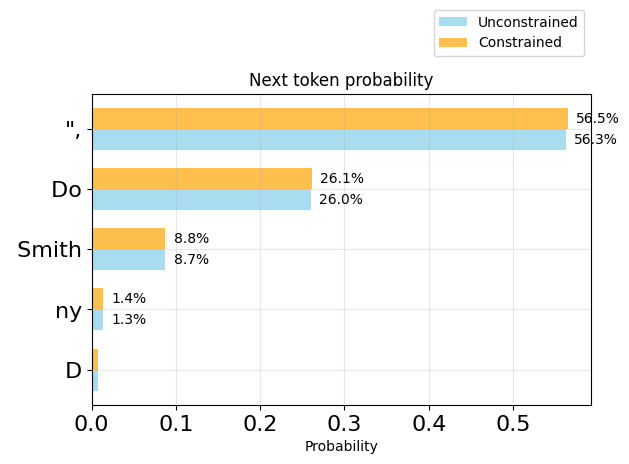

In [15]:
plot_token_distributions(generator.logits_processor, positions=[7], k=5)

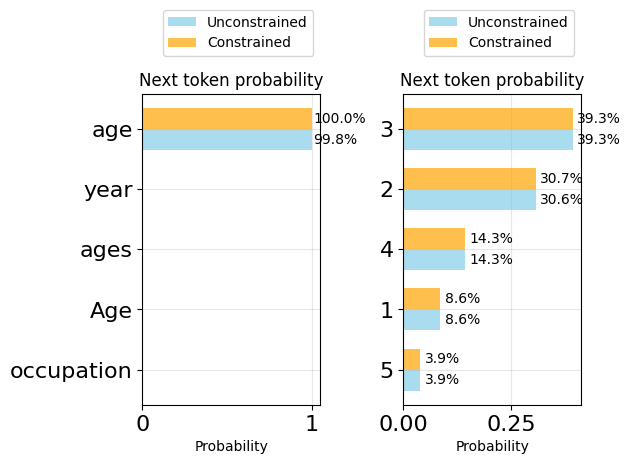

In [16]:
plot_token_distributions(generator.logits_processor, positions=[9,12], k=5)

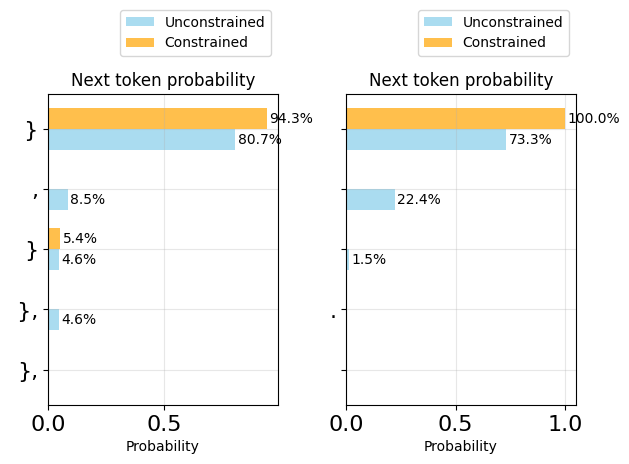

In [17]:
plot_token_distributions(generator.logits_processor, positions=[14, 15], k=5)

# You try!

In [18]:
from typing import Literal

class EmployedPerson(BaseModel):
    name: str
    age: int
    job: Literal[
        'Doctor', 
        'Basketball Player', 
        'Welder',
        'Dog catcher'
    ]

gen = track_logits(
    outlines.generate.json(
        model, 
        EmployedPerson, 
        sampler=outlines.samplers.greedy()
    )
)

person = gen(
    template(
        model, 
        "Give me a person with a name, age, and job."
    )
)

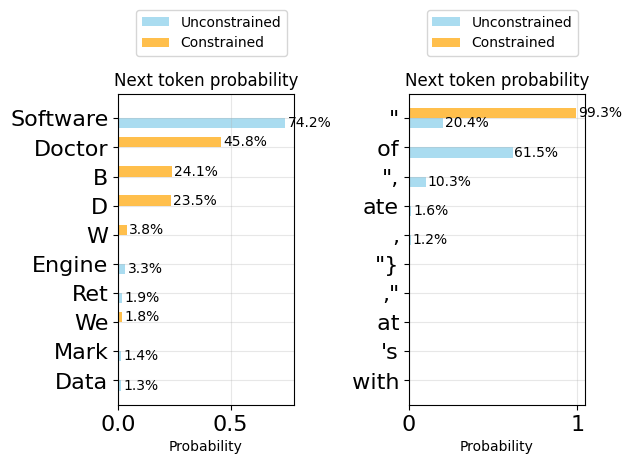

In [19]:
plot_token_distributions(gen.logits_processor, positions=[20, 21])